In [2]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import scipy as scipy
import seaborn as sns

# Cross validation for evaluation

Benefits of cross validation:
* Uses the data more effectively than when using a standard training and test division
* More robust (with train-test division you may get (un)lucky)
* Gives insight into the sensitivity of the model

Disadvantage:
* Computational cost

## Example

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Using a decision tree

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.90434783 0.92173913 0.92920354 0.94690265 0.90265487]


In [5]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9209696036937283


In [6]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.016447650776473855


### Using a naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
scores = cross_val_score(nb, cancer.data, cancer.target, cv=5)

In [10]:
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.92173913 0.92173913 0.95575221 0.94690265 0.95575221]


In [11]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9403770681031165


In [12]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.015557113146857272


### Leave one out cross validation

Leave one out cross validation is a special type of cross validation, where each fold is a single sample
* Can provides better estimates on smaller datasets, but is more time.consuming

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [14]:
nb = GaussianNB()
scores = cross_val_score(nb, cancer.data, cancer.target, cv=loo)

In [15]:
print("Cross validation scores: {}".format(scores))

Cross validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1

In [16]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9384885764499121


In [17]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.24026603655724954


# Overfitting

## Load the data

In [19]:
from sklearn.datasets import load_breast_cancer

# Load the data and divide into training and test
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

## Decision tree overfitting

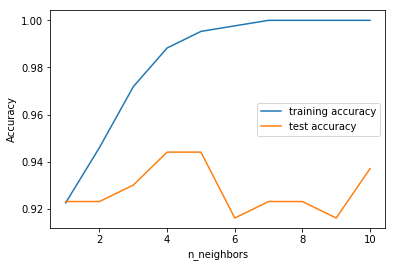

In [22]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []
# try max depths from 1 to 10
max_depth_list = range(1, 11)

for depth in max_depth_list:
    # build the model
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_list, training_accuracy, label="training accuracy")
plt.plot(max_depth_list, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

## kNN overfitting

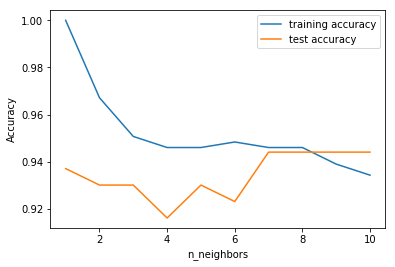

In [23]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

## Selecting parameters using a validation set

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

Divide the data into training data, validation data, and test data

In [25]:
cancer = load_breast_cancer()
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=43)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:319
Size of validation set:107
Size of test set:143


Find the best number of neighbors using the validation set

In [26]:
best_score = 0
for num_neighbors in range(1,15):
    # Learn the model with a certain numnber of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    
    # Evaluate the model
    score = knn.score(X_val, y_val)
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best score on validation set: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 8
Best score on validation set: 0.9626168224299065
Score on training/validation set: 0.9389671361502347
Score on test set: 0.958041958041958


## Selecting parameters using cross validation

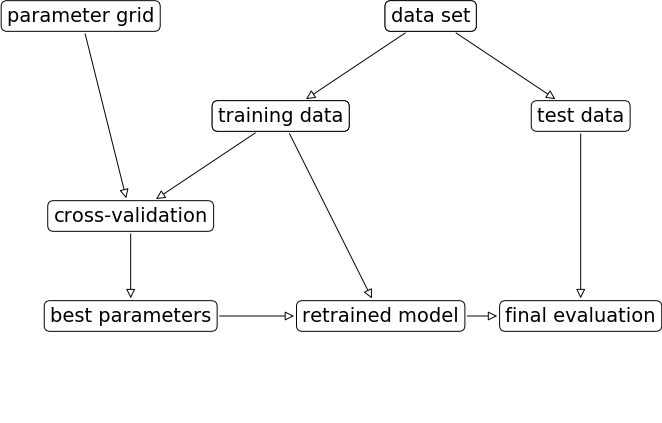

In [27]:
mglearn.plots.plot_grid_search_overview()

Divide the data into training data and test data (no validation data!)

In [28]:
cancer = load_breast_cancer()
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:319
Size of test set:143


Find the best number of neighbors using cross validation

In [29]:
from sklearn.model_selection import cross_val_score
best_score = 0
for num_neighbors in range(1,15):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform cross validation
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=5)
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 8
Best average score: 0.9293466223698781
Score on training/validation set: 0.9389671361502347
Score on test set: 0.958041958041958


### sklearn actually has support for performing this operation

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Fix the parameter space
parameters = {'n_neighbors': range(1,15)}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)

In [32]:
# Load the data and divide into train and test
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

Perform the search; all results are stored within `grid_search`

In [33]:
grid_search.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 15)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

Print some results

In [34]:
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test score: 0.96


In [35]:
print("Best parameter: {}".format(grid_search.best_params_))

Best parameter: {'n_neighbors': 8}


In [36]:
print("Best cross-validation score: {}".format(grid_search.best_score_))

Best cross-validation score: 0.9295774647887324


In [37]:
print("Best estimator: {}".format(grid_search.best_estimator_))

Best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')


In [38]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000000,0.000000,0.002399,0.001959,1,{'n_neighbors': 1},0.965116,0.872093,0.883721,0.869048,...,0.896714,0.035424,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001597,0.001956,0.000801,0.001601,2,{'n_neighbors': 2},0.953488,0.906977,0.906977,0.857143,...,0.906103,0.030440,13,0.958824,0.964706,0.973529,0.970760,0.970760,0.967716,0.005300
2,0.000000,0.000000,0.000800,0.001600,3,{'n_neighbors': 3},0.953488,0.883721,0.965116,0.869048,...,0.917840,0.037583,9,0.938235,0.955882,0.941176,0.956140,0.947368,0.947761,0.007354
3,0.001600,0.001959,0.002112,0.002704,4,{'n_neighbors': 4},0.953488,0.883721,0.941860,0.845238,...,0.908451,0.039491,12,0.929412,0.955882,0.938235,0.941520,0.938596,0.940729,0.008592
4,0.000800,0.001600,0.002399,0.001959,5,{'n_neighbors': 5},0.953488,0.872093,0.976744,0.869048,...,0.920188,0.043199,6,0.917647,0.950000,0.926471,0.932749,0.932749,0.931923,0.010599
5,0.000000,0.000000,0.000820,0.001640,6,{'n_neighbors': 6},0.965116,0.883721,0.953488,0.869048,...,0.920188,0.037807,6,0.917647,0.944118,0.926471,0.944444,0.935673,0.933670,0.010371
6,0.000000,0.000000,0.000000,0.000000,7,{'n_neighbors': 7},0.988372,0.872093,0.953488,0.869048,...,0.922535,0.046405,3,0.920588,0.944118,0.926471,0.941520,0.935673,0.933674,0.008919
7,0.003121,0.006243,0.003129,0.006259,8,{'n_neighbors': 8},0.988372,0.872093,0.976744,0.880952,...,0.929577,0.047754,1,0.917647,0.941176,0.926471,0.938596,0.935673,0.931913,0.008692
8,0.000000,0.000000,0.000000,0.000000,9,{'n_neighbors': 9},0.988372,0.872093,0.965116,0.880952,...,0.922535,0.046454,3,0.920588,0.938235,0.926471,0.935673,0.929825,0.930158,0.006339
9,0.000000,0.000000,0.000000,0.000000,10,{'n_neighbors': 10},0.988372,0.883721,0.965116,0.880952,...,0.927230,0.043254,2,0.920588,0.935294,0.923529,0.935673,0.932749,0.929567,0.006281
